## Wykład 6 - Osadzenia wektorowe (Embeddings) 

* wykorzystanie gotowych modeli do wektoryzacji słów i zdań
* kilka szczegółow przydatnych na lab

In [1]:
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pobieramy wektory
# https://huggingface.co/fse/fasttext-wiki-news-subwords-300
model = api.load("fasttext-wiki-news-subwords-300") 

In [3]:
word_vector = model["kot"]

In [4]:
word_vector.shape

(300,)

In [5]:
word_vector[:5]

array([-0.014416, -0.063264,  0.073056, -0.024186, -0.058878],
      dtype=float32)

##### Najbliższe słowa

In [6]:
model.most_similar("Warszawa", topn=10)

[('Warszawska', 0.8751598000526428),
 ('Warszawie', 0.8580816388130188),
 ('Warszawskie', 0.8529821038246155),
 ('Warszawianka', 0.8490052223205566),
 ('Warszawski', 0.8447102308273315),
 ('Warszawy', 0.841517984867096),
 ('Warszawskiego', 0.8095262050628662),
 ('Warszawskiej', 0.8029562830924988),
 ('Polski', 0.7724303007125854),
 ('Polskie', 0.7630934119224548)]

In [7]:
model.most_similar("poland", topn=10)

[('finland', 0.7272713780403137),
 ('lithuania', 0.7255911231040955),
 ('hungary', 0.72270268201828),
 ('russia', 0.7226428985595703),
 ('romania', 0.7162309288978577),
 ('slovakia', 0.7160787582397461),
 ('warsaw', 0.7158565521240234),
 ('germany', 0.7062060236930847),
 ('latvia', 0.7030742168426514),
 ('sweden', 0.7024861574172974)]

In [8]:
model.most_similar("student", topn=10)

[('students', 0.7918991446495056),
 ('studen', 0.7834596633911133),
 ('college-student', 0.7712274789810181),
 ('students-and', 0.767078161239624),
 ('ex-student', 0.7642698287963867),
 ('non-student', 0.7591925263404846),
 ('teacher', 0.756062388420105),
 ('grad-student', 0.751081645488739),
 ('graduate-student', 0.7449191808700562),
 ('student-student', 0.7319725751876831)]

In [9]:
model.most_similar("the", topn=10)

[('its', 0.7545767426490784),
 ('first--the', 0.7534651160240173),
 ('them-the', 0.7453412413597107),
 ('their', 0.7397413849830627),
 ('you-the', 0.7391120195388794),
 ('his', 0.7357288002967834),
 ('this', 0.7341270446777344),
 ('this-the', 0.7223761081695557),
 ('all--the', 0.7223074436187744),
 ('in--the', 0.7206947803497314)]

In [10]:
model.most_similar("Hamlet", topn=10)

[('Ur-Hamlet', 0.786028265953064),
 ('Shakespeare', 0.7498656511306763),
 ('Macbeth', 0.7144495844841003),
 ('Polonius', 0.7090291380882263),
 ('Hamnet', 0.7087203860282898),
 ('Fortinbras', 0.6917569637298584),
 ('Shakespear', 0.6818779110908508),
 ('Hamlett', 0.6607145667076111),
 ('Shakespeares', 0.660534143447876),
 ('Macbeths', 0.65373694896698)]

#### Odległość kosinusowa

In [11]:
word1 = "tangerine"
word2 = "orange"
vec1 = model[word1].reshape(1, -1)
vec2 = model[word2].reshape(1, -1)

In [12]:
cosine_similarity(vec1, vec2)

array([[0.7543681]], dtype=float32)

In [13]:
word1 = "kot"
word2 = "orange"
vec1 = model[word1].reshape(1, -1)
vec2 = model[word2].reshape(1, -1)

In [14]:
cosine_similarity(vec1, vec2)

array([[0.18303955]], dtype=float32)

#### Wizualizacja wektorów w przestrzeni dwuwymiarowej

In [15]:
words = ["apple", "banana", "orange", "pear", "tangerine",
         "dog", "cat", "parrot", "chicken", "bird", "owl", "mouse",
        "warsaw", "london", "paris", "berlin"]

In [16]:
embs = np.array([model[word] for word in words])
embs.shape

(16, 300)

#### PCA

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(embs)

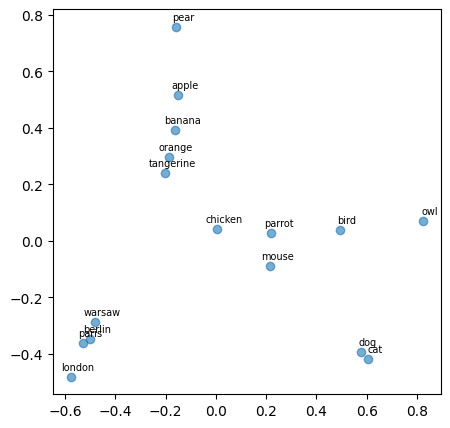

In [18]:
plt.figure(figsize=(5, 5))

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)

for i in range(len(words)):
    plt.annotate(words[i], (X_pca[:, 0][i], X_pca[:, 1][i]),
                 textcoords="offset points", xytext=(5, 5), ha='center', fontsize=7, color='black')

#### TSNE

In [19]:
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
X_tsne = tsne.fit_transform(embs)

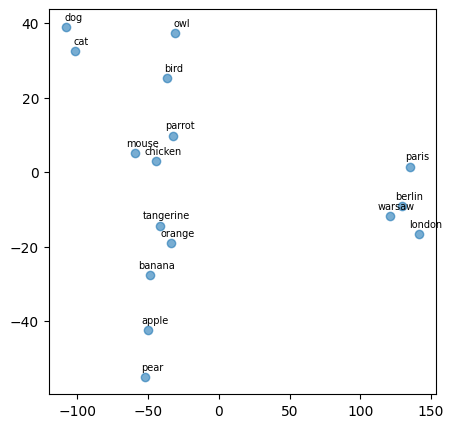

In [20]:
plt.figure(figsize=(5, 5))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6)

for i in range(len(words)):
    plt.annotate(words[i], (X_tsne[:, 0][i], X_tsne[:, 1][i]),
                 textcoords="offset points", xytext=(5, 5), ha='center', fontsize=7, color='black')

#### Wektoryzacja całych sekwencji
* w fasttext mamy ograniczony słownik dostępnych słów
* wyrazy wieloznaczne stanowią problem

In [21]:
from transformers import AutoTokenizer, AutoModel
import torch

In [22]:
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

In [23]:
sentence = "The king ruled the kingdom."

In [24]:
tokenizer("king", return_tensors="pt", return_attention_mask=True)

{'input_ids': tensor([[ 101, 2332,  102]]), 'token_type_ids': tensor([[0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1]])}

In [25]:
tokens = tokenizer(sentence, return_tensors="pt", return_attention_mask=True)

In [26]:
tokens

{'input_ids': tensor([[ 101, 1996, 2332, 5451, 1996, 2983, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [27]:
with torch.no_grad():
    outputs = model(**tokens)

token_embeddings = outputs.last_hidden_state  # (batch_size, seq_len, hidden_dim)

In [28]:
token_embeddings.shape

torch.Size([1, 8, 768])

In [29]:
# znajdujemy indeks tokenu odpowiadającego słowu "king"
word_index = tokens.input_ids[0].tolist().index(tokenizer.convert_tokens_to_ids("king"))
word_index

2

In [30]:
# i odczytujemy wektor
word_vector = token_embeddings[0, word_index, :].numpy()
word_vector.shape

(768,)

In [31]:
def get_bert_vec(word, sentence):
    tokens = tokenizer(sentence, return_tensors="pt", return_attention_mask=True)
    with torch.no_grad():
        outputs = model(**tokens)

    token_embeddings = outputs.last_hidden_state
    word_index = tokens.input_ids[0].tolist().index(tokenizer.convert_tokens_to_ids(word))
    word_vector = token_embeddings[0, word_index, :].numpy()
    return word_vector.reshape(1, -1)

In [32]:
sentence1 = "The dog let out a loud bark."
sentence2 = "The old oak tree had rough, peeling bark."

In [33]:
vec1 = get_bert_vec("bark", sentence1)
vec2 = get_bert_vec("bark", sentence2)

In [34]:
cosine_similarity(vec1, vec2)

array([[0.5202761]], dtype=float32)

In [35]:
vec_dog = get_bert_vec("dog", "dog")
vec_tree = get_bert_vec("tree", "tree")

In [36]:
cosine_similarity(vec1, vec_dog)

array([[0.34185818]], dtype=float32)

In [37]:
cosine_similarity(vec2, vec_dog)

array([[0.17578514]], dtype=float32)

In [38]:
cosine_similarity(vec2, vec_tree)

array([[0.3503309]], dtype=float32)

In [39]:
cosine_similarity(vec1, vec_tree)

array([[0.22784363]], dtype=float32)

#### Przydatne do lab

##### Range

In [40]:
# range zwraca generator liczb od pierwszego argumentu (włącznie, domyślnie 0) do drugiego (wyłącznie)
range(5)

range(0, 5)

In [41]:
list(range(5))

[0, 1, 2, 3, 4]

In [42]:
list(range(4, 10))

[4, 5, 6, 7, 8, 9]

##### Łączenie list

In [43]:
['a', 'b', 'c'] + [1, 2]

['a', 'b', 'c', 1, 2]

##### Enumerate

In [44]:
# enumarate daje iterator, który przechodzi przez kolejne elemeny np. listy i jednocześnie daje indeks elementu
for i, el in enumerate(['a', 'b', 'c']):
    print(i, el)

0 a
1 b
2 c


#### Uśrednianie tensorów w odpowiedniej osi

In [45]:
# tensor trzywymiarowy
t = torch.tensor([[[1, 2], [3, 4], [5, 6]],
                 [[1, 2], [3, 4], [5, 6]],
                 [[1, 2], [3, 4], [5, 6]],
                 [[1, 2], [3, 4], [5, 6]]], dtype=torch.float)

In [46]:
t

tensor([[[1., 2.],
         [3., 4.],
         [5., 6.]],

        [[1., 2.],
         [3., 4.],
         [5., 6.]],

        [[1., 2.],
         [3., 4.],
         [5., 6.]],

        [[1., 2.],
         [3., 4.],
         [5., 6.]]])

In [47]:
t.shape

torch.Size([4, 3, 2])

In [48]:
# z całego tensora
t.mean()

tensor(3.5000)

In [49]:
t.mean(axis=0)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [50]:
t.mean(axis=0).shape

torch.Size([3, 2])

In [51]:
t.mean(axis=1)

tensor([[3., 4.],
        [3., 4.],
        [3., 4.],
        [3., 4.]])

In [52]:
t.mean(axis=1).shape

torch.Size([4, 2])

In [53]:
t.mean(axis=2)

tensor([[1.5000, 3.5000, 5.5000],
        [1.5000, 3.5000, 5.5000],
        [1.5000, 3.5000, 5.5000],
        [1.5000, 3.5000, 5.5000]])

In [54]:
t.mean(axis=2).shape

torch.Size([4, 3])